## Cifar Image Classification

Courtesy: https://www.cs.toronto.edu/~kriz/cifar.html

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

### Importing Libraries 

In [1]:
import numpy as np
import _pickle
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import applications
from keras.models import Model
from keras.utils import to_categorical 
from keras.optimizers import SGD

Using TensorFlow backend.


### Importing Dataset (Method 1)

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = _pickle.load(fo, encoding='bytes')
    return dict

In [4]:
dict1 = {}
dict2 = {}
dict3 = {}
dict4 = {}
dict5 = {}
test_batch = {}

dict1 = unpickle('C:/Devansh/ML/Datasets/Objects/cifar-10-batches-py/data_batch_1')
dict2 = unpickle('C:/Devansh/ML/Datasets/Objects/cifar-10-batches-py/data_batch_2')
dict3 = unpickle('C:/Devansh/ML/Datasets/Objects/cifar-10-batches-py/data_batch_3')
dict4 = unpickle('C:/Devansh/ML/Datasets/Objects/cifar-10-batches-py/data_batch_4')
dict5 = unpickle('C:/Devansh/ML/Datasets/Objects/cifar-10-batches-py/data_batch_5')
test_batch = unpickle('C:/Devansh/ML/Datasets/Objects/cifar-10-batches-py/test_batch')

In [5]:
X1 = dict1[b'data'] 
Y1 = dict1[b'labels']

X2 = dict2[b'data'] 
Y2 = dict2[b'labels']

X3 = dict3[b'data'] 
Y3 = dict3[b'labels']

X4 = dict4[b'data'] 
Y4 = dict4[b'labels']

X5 = dict5[b'data'] 
Y5 = dict5[b'labels']

testX = test_batch[b'data'] 
testY = test_batch[b'labels']

In [6]:
# X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y1 = np.array(Y1)
Y2 = np.array(Y2)
Y3 = np.array(Y3)
Y4 = np.array(Y4)
Y5 = np.array(Y5)
testY = np.array(testY)

In [21]:
# X1 = X1.reshape(10000, 3, 32, 32).astype("uint8")
# X2 = X2.reshape(10000, 3, 32, 32).astype("uint8")
# X3 = X3.reshape(10000, 3, 32, 32).astype("uint8")
# X4 = X4.reshape(10000, 3, 32, 32).astype("uint8")
# X5 = X5.reshape(10000, 3, 32, 32).astype("uint8")

In [7]:
X1 = X1.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X2 = X2.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X3 = X3.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X4 = X4.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X5 = X5.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
testX = testX.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [8]:
trainX =np.concatenate((X1,X2,X3,X4,X5),axis=0)
trainY =np.concatenate((Y1,Y2,Y3,Y4,Y5),axis=0)

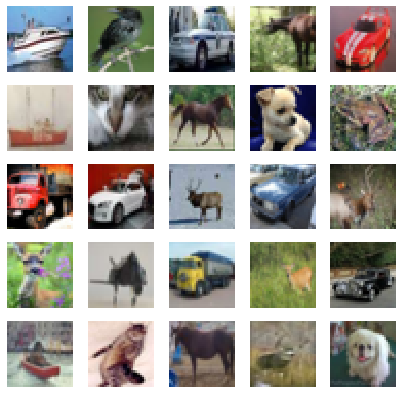

In [19]:
fig, axes1 = plt.subplots(5,5,figsize=(7,7))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X2)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X2[i:i+1][0])

### Importing Dataset (Method 2)

In [28]:
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


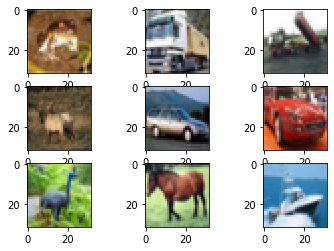

In [10]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i])
# show the figure
plt.show()

### Pre-processing Data 

In [ ]:
test_batch[ b'filenames']

(32, 32, 3)


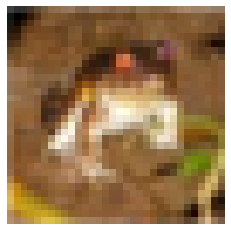

In [24]:
ax = plt.gca()
ax.set_axis_off()
print(X1[0].shape)
ax.imshow(X1[0])

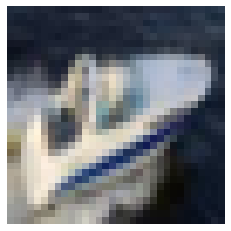

In [23]:
i = np.random.choice(range(len(X1)))
ax = plt.gca()
ax.set_axis_off()
ax.imshow(X1[i:i+1][0])

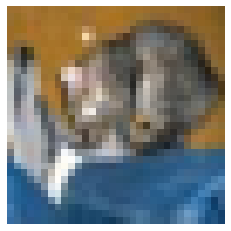

In [29]:
ax = plt.gca()
ax.set_axis_off()
ax.imshow(testX[0:1][0])

In [9]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [10]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

### Applying AlexNet

In [12]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(3,3), strides=(1,1), padding="same"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same"))
model.add(Activation("relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same"))
model.add(Activation("relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32*32*3,)))
model.add(Activation("relu"))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

# Compile the model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       221440    
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)        

In [30]:
# model = Sequential()

# # 1st Convolutional Layer
# model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(3,3), strides=(1,1), padding='same'))
# # model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))

# # 2nd Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))

# # 3rd Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('relu'))

# # 4th Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('relu'))

# # 5th Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# # Passing it to a Fully Connected layer
# model.add(Flatten())
# # 1st Fully Connected Layer
# model.add(Dense(4096, input_shape=(32*32*3,)))
# model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.4))

# # 2nd Fully Connected Layer
# model.add(Dense(4096))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))

# # 3rd Fully Connected Layer
# model.add(Dense(1000))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))

# # Output Layer
# model.add(Dense(10))
# model.add(Activation('softmax'))

# model.summary()

# # Compile the model
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       221440    
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 384)       885120    
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 384)      

In [13]:
# Compile the model.
# opt = optimizers.adam(learning_rate=0.01)
# model.compile(
#   optimizer=opt,
#   loss='categorical_crossentropy',
#   metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
# )

# Train the model.
history=model.fit(
  trainX,
  trainY,
  epochs=30,
  batch_size=64,
  validation_data=(testX, testY)  # A binary matrix representation of the input.
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 1385s 28ms/step - loss: 2.2898 - accuracy: 0.1289 - val_loss: 2.2007 - val_accuracy: 0.1896
Epoch 2/30
50000/50000 [==============================] - 1330s 27ms/step - loss: 2.0465 - accuracy: 0.2295 - val_loss: 1.9722 - val_accuracy: 0.2621
Epoch 3/30
50000/50000 [==============================] - 1333s 27ms/step - loss: 1.8329 - accuracy: 0.3086 - val_loss: 1.9120 - val_accuracy: 0.3236
Epoch 4/30
50000/50000 [==============================] - 1254s 25ms/step - loss: 1.6911 - accuracy: 0.3735 - val_loss: 1.5429 - val_accuracy: 0.4244
Epoch 5/30
50000/50000 [==============================] - 1233s 25ms/step - loss: 1.5718 - accuracy: 0.4210 - val_loss: 1.4822 - val_accuracy: 0.4550
Epoch 6/30
50000/50000 [==============================] - 1226s 25ms/step - loss: 1.4727 - accuracy: 0.4598 - val_loss: 1.4558 - val_accuracy: 0.4688
Epoch 7/30
50000/50000 [==========================

In [14]:
results=model.evaluate(testX,testY,batch_size=64)
print('test loss', results[0])
print('test acc', results[1])

10000/10000 [==============================] - 53s 5ms/step
test loss 0.6918698780059814
test acc 0.7865999937057495


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


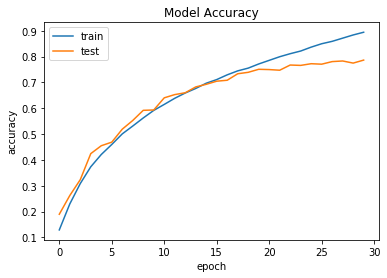

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

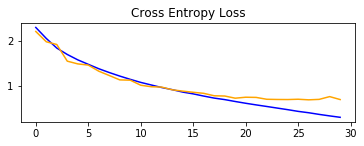

In [16]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

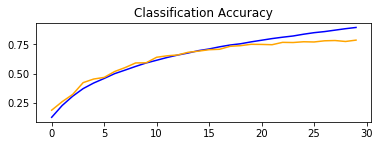

In [17]:
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [19]:
import sys
# save plot to file
filename = sys.argv[0].split('/')[-1]
plt.savefig(filename + '_plot.png')
plt.close()

### Rough 

In [ ]:
#machinelearningmastery
#keras load from directory wala stuff
#visualization

In [ ]:
x = np.ones((1, 2, 3))
np.transpose(x, (1, 0, 2)).shape

In [ ]:
X2 = dict1[b'data'] 
X2 = X2.reshape(10000, 32, 32, 3)

fig, axes1 = plt.subplots(5,5,figsize=(7,7))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X2)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

In [ ]:
# data_upscaled = np.zeros((10000, 3, 224, 224), dtype = 'uint8')

# data_upscaled.shape

# for i, img in enumerate(X5):
#     im = np.transpose(img, (1, 2, 0))
#     large_img = cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
#     data_upscaled[i] = np.transpose(large_img, (2, 0, 1))
#     print(str(i+1) + " resized")

# X5 = np.zeros((10000, 3, 224, 224), dtype = 'uint8')
# X5 = data_upscaled 

# for i, img in enumerate(testX):
#     im = np.transpose(img, (1, 2, 0))
#     large_img = cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
#     data_upscaled[i] = np.transpose(large_img, (2, 0, 1))
#     print(str(i+1) + " resized")

# testX = np.zeros((10000, 3, 224, 224), dtype = 'uint8')
# testX = data_upscaled 

In [ ]:
a = np.array((1,2,3))
b = np.array((4,5,6))
c = np.array((7,8,9))
d =np.concatenate((a,b,c),axis=0)
d

In [ ]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# # define data
# data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# # save to csv file
savetxt('data.csv', X1, delimiter=',')